## Python: (not) solving the TSP - circuit distance

Here we use a Python implementation of the method to find candidate solutions to instances of the TSP
that is based on diminishing the circuit distance.

First we import some code.
Note in particular the companion [tsp_utils.py](utils.py)
and [generators.py](generators.py) modules.

In [1]:
import numpy as np

import tsp_utils as tsp
from generators import nswap_generators, lswap_generators

First we generate a random instance of the problem:
15 random points in 2d,
in a random order.

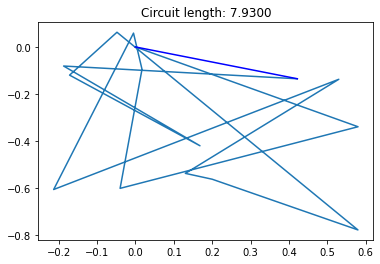

In [9]:
n = 15

data = tsp.get_random_data(n)

pmatrix = tsp.pmatrix_from_data(data)

tsp.paint_circuit(pmatrix)

Note that, for simplicity, we are working on the complex plane rather than on euclidean 2d
(so that each position fits in a single number).
The `pmatrix` object is a complex matrix, in which each different row (and column)
represents the problem centered on each different point (or city).

Now we choose a generator set.
we can see how each generator changes the index -circuit- of the instance.

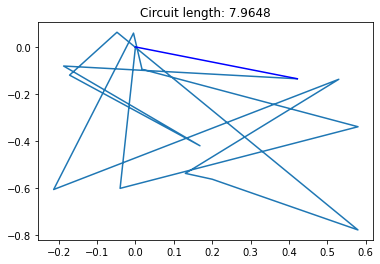

In [10]:
gens = nswap_generators(n)

pmatrix2 = gens[2] @ pmatrix @ gens[2].T

tsp.paint_circuit(pmatrix2)

Now we use our compass function and this generator set to find a sink,
i.e., a candidate solution for this instance of the problem.

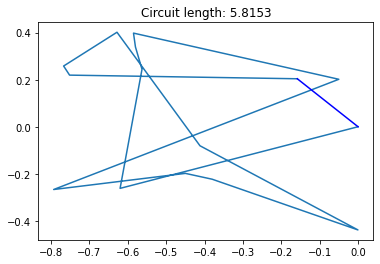

In [11]:
path = tsp.path_to_sink(pmatrix, nswap_generators, tsp.length)

tsp.paint_circuit(path[-1])

If we use more complex generator sets, we obtain less sinks.

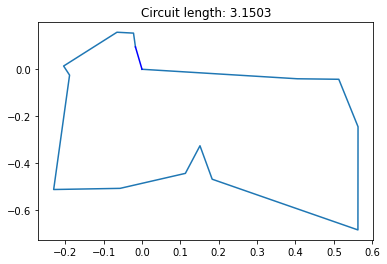

In [12]:
path = tsp.path_to_sink(pmatrix, lswap_generators, tsp.length)

tsp.paint_circuit(path[-1])

To find another sink, we either use another generator set,
or we shuffle the index before sorting it.

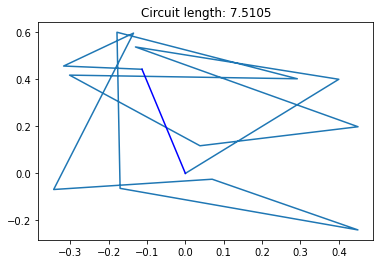

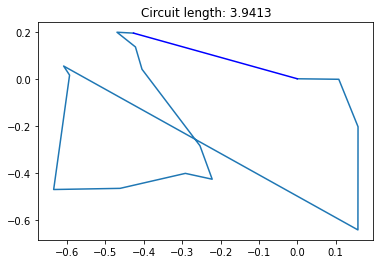

In [13]:
data_r = tsp.randomize_data(data)

pmatrix_r = tsp.pmatrix_from_data(data_r)

tsp.paint_circuit(pmatrix_r)

path_r = tsp.path_to_sink(pmatrix_r, lswap_generators, tsp.length)

tsp.paint_circuit(path_r[-1])

So, of course, if we use a complex enough (breaking the circuit at enough places
and rearranging the resulting pieces in all possible ways)
generator set, we will manage to get an algorithm guaranteed to find the solution,
i.e., guaranteed to produce a graph with a single sink.

Conjecture: There are sinks from which the only length reducing permutation
requires arbitraryly many breaks in the circuit.
Or, in other words: the complexity of the needed generator set will always increase
with the number of cities.